In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
FILE_X = "data/q4/q4x.dat"
FILE_Y = "data/q4/q4y.dat"

In [2]:
datax = np.genfromtxt(FILE_X, delimiter='  ')

In [3]:
#normalizing
mean1 = np.mean(datax[:,0])
var1 = np.var(datax[:,0])
mean2 = np.mean(datax[:,1])
var2 = np.var(datax[:,1])
datax[:,0] = (datax[:,0] - mean1)/(var1**0.5)
datax[:,1] = (datax[:,1] - mean2)/(var2**0.5)

In [5]:
## 0 is for alaska
datay = []
with open(FILE_Y, 'r') as f:
    for line in f:
        if("Alaska" in line):
            datay.append(0)
        else:
            datay.append(1)
datay = np.asarray(datay)

In [6]:
#params
frac0 = 0
mu0 = np.zeros(2)
mu1 = np.zeros(2)
phi = 0.0
var = np.zeros((2,2))

for i in range(0,len(datax)):
    if(datay[i] == 0):
        frac0+=1;
        mu0 += datax[i]
    else:
        phi+=1
        mu1 += datax[i]

phi = phi/len(datay)
mu0 = mu0/(frac0)
mu1 = mu1/(len(datay) - frac0)

for i in range(0,len(datax)):
    x = np.zeros(2)
    if(datay[i] == 0):
        x = datax[i] - mu0
    else:
        x = datax[i] - mu1
    x = np.asarray([x])
    var += np.matmul(x.T,x)

var /= len(datay)

In [ ]:
mu1

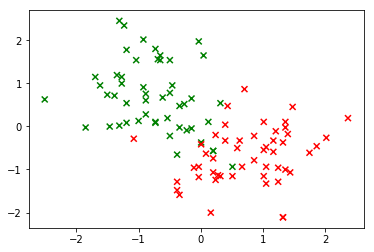

In [7]:
# training data plotting
color = ['red' if l == 1 else 'green' for l in datay]
plt.scatter(datax[:,0],datax[:,1],color = color,marker = 'x')

In [35]:
pars = np.zeros(3)
inv = np.linalg.inv(var)
# pars0 + pars1 * x1 + pars2 * x2 = 0
pars[0] = -(2*(math.log(phi/(1-phi))) + (mu0[0]**2 - mu1[0]**2) * inv[0][0] + (mu0[1]**2 - mu1[1]**2) * inv[1][1])
pars[1] = (2*(mu0[0]-mu1[0])*inv[0][0] + (inv[0][1] + inv[1][0])*(mu0[1]-mu1[1]))
pars[2] = (2*(mu0[1]-mu1[1])*inv[1][1] + (inv[0][1] + inv[1][0])*(mu0[0]-mu1[0]))

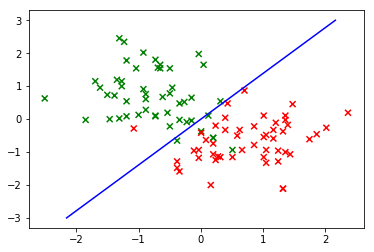

In [36]:
# training data plotting
color = ['red' if l == 1 else 'green' for l in datay]
plt.scatter(datax[:,0],datax[:,1],color = color,marker = 'x')
x = np.linspace(-3,3,100)
y = (pars[0] + pars[2]*x)/(-pars[1])
plt.plot(y,x, '-r',color = 'blue')

In [30]:
# diff variances
var0 = np.zeros((2,2)).astype(float)
var1 = np.zeros((2,2)).astype(float)
for i in range(0,len(datay)):
    x = np.zeros(2)
    if(datay[i] == 0):
        x = datax[i] - mu0
    else:
        x = datax[i] - mu1
    x = np.asarray([x])
    if(datay[i]==0):
        var0 += np.matmul(x.T,x)
    else:
        var1 += np.matmul(x.T,x)
var0 = var0 / frac0
var1 = var1 / (len(datay) - frac0)

In [38]:
pars = np.zeros(6)
# pars[0] + pars[1]*x1 + pars[2] * x2 + pars[3] * x1 * x2 + pars[4]* x1**2 + pars[5]*x2**2
inv0 = np.linalg.inv(var0)
inv1 = np.linalg.inv(var1)
pars[0] = mu0[0]**2 * inv0[0][0] + mu0[0]*mu0[1] * (inv0[0][1]+inv0[1][0]) + mu0[1]**2 * inv0[1][1] - (mu1[0]**2 * inv1[0][0] + mu1[0]*mu1[1] * (inv1[0][1]+inv1[1][0]) + mu1[1]**2 * inv1[1][1]) + 2 * math.log(phi/(1-phi))
pars[1] = -2 * mu0[0]*inv0[0][0] - mu0[1]*(inv0[0][1]+inv0[1][0]) - (-2 * mu1[0]*inv1[0][0] - mu1[1]*(inv1[0][1]+inv1[1][0]))
pars[2] = -2 * mu0[1]*inv0[1][1] - mu0[0]*(inv0[0][1]+inv0[1][0]) - (-2 * mu1[1]*inv1[1][1] - mu1[0]*(inv1[0][1]+inv1[1][0]))
pars[3] = (inv0[0][1]+inv0[1][0]) - (inv1[0][1]+inv1[1][0])
pars[4] = inv0[0][0] - inv1[0][0]
pars[5] = inv0[1][1] - inv1[1][1]

In [39]:
pars

array([-1.35518673,  7.61570639, -5.71934613,  2.57367267,  0.6713478 ,
       -0.86593198])

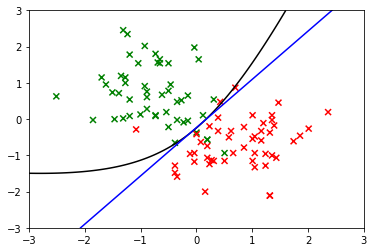

In [41]:

color = ['red' if l == 1 else 'green' for l in datay]
plt.scatter(datax[:,0],datax[:,1],color = color,marker = 'x')
x = np.linspace(-3,3,100)
y = (pars[0] + pars[2]*x)/(-pars[1])
plt.plot(y,x, '-r',color = 'blue')
xlist = np.linspace(-3.0, 3.0, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(-3.0, 3.0, 100) 
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
F = pars[0]  + pars[1]*X + pars[2]*Y + pars[3]*X*Y + pars[4]*(X**2) + pars[5]*(Y**2)
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')